Code that reads in an audio clip and background file, makes it into a 5 second clip, and pushes it through a saved model.

In [1]:
import keras
from pydub import AudioSegment
from mb_utils import *

from datetime import datetime

#import pyaudio
import wave

Using TensorFlow backend.
/anaconda/lib/python3.6/site-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
%matplotlib inline

In [3]:
from importlib import reload
import mb_utils

In [4]:
reload(mb_utils)
from mb_utils import *

In [37]:
import IPython

### initialization: load trained model

In [5]:
model = keras.models.load_model('trained_models/6782372.h5')

## read file and predict

In [34]:
audio_file = 'recorded_clips/notenoughs/00.wav'
background_filepath = 'recorded_clips/fullbackgrounds_trimmed_5sec/08.wav'

In [35]:
# trims/pads to 5 sec and saves to runtime_temp.wav
preprocess_runtime_clip(audio_file, background_filepath=background_filepath)

   prediction: not_enough.   [0.0217, 0.2937, 0.6846]


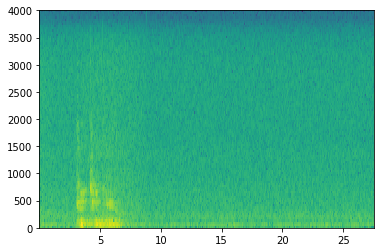

In [36]:
# feed current clip to model and get prediction
pred, preds = run_model_on_clip(model, 'runtime_temp.wav')
preds_nice = ', '.join(['{:.4f}'.format(p) for p in preds[0]])
print('   prediction: {}.   [{}]'.format(pred, preds_nice))

In [38]:
IPython.display.Audio('runtime_temp.wav')

In [39]:
IPython.display.Audio('recorded_clips/enoughs/06.wav')